In [1]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

# Watermark is not required for this code, but is included for information. 
import watermark
%load_ext watermark
%watermark -a "ELEANOR LUTZ" -d -v -iv -m

watermark                       1.8.1
cartopy                         0.17.0
matplotlib                      3.0.3
matplotlib.backends.backend_pdf 3.0.3
ELEANOR LUTZ 2019-07-07 

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores  : 12
interpreter: 64bit


In [2]:
# Define variables used across all maps (size, color, projection center points)

figsize = (19.53/2, 18.55/2)
ortho = [330, 30]

In [3]:
# Define function to save images in a standardized way 

def set_save_image(fig, savename, dpi=600, show=False):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_global()
        
    # Remove all padding and margins
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    if show == True: 
        plt.show()
    plt.clf()
    plt.close('all')

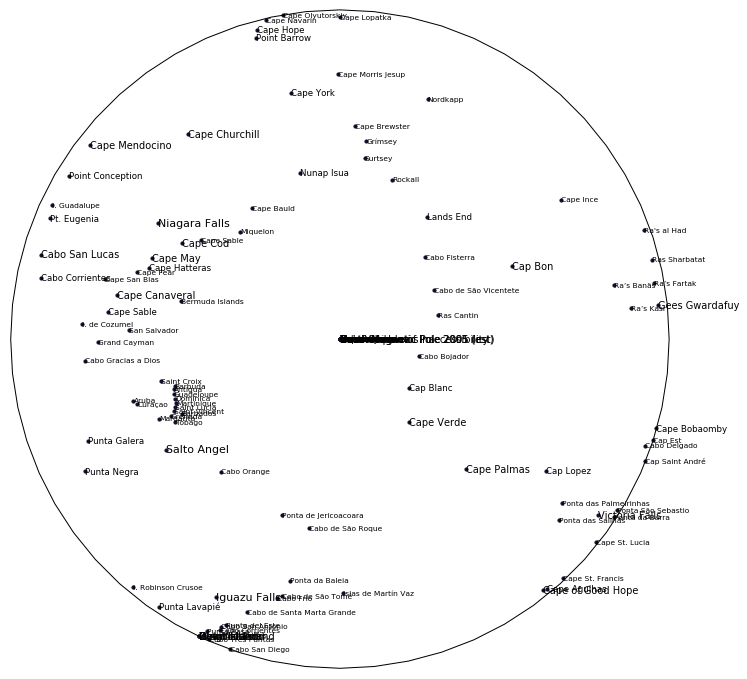

In [4]:
# PLOT PHYSICAL GEOGRAPHY LABELS

fname = "./data/Natural_Earth/ne_10m_geography_regions_points/ne_10m_geography_regions_points.shp"
savename = './figures/water_point_labels.pdf'
shp = shpreader.Reader(fname)

fig = plt.figure(figsize=figsize)
grid = matplotlib.gridspec.GridSpec(5565, 5859)
ax = fig.add_subplot(grid[39:5565-39, 186:5859-186], projection=ccrs.Orthographic(*ortho))

for record, state in zip(shp.records(), shp.geometries()):
    text = record.attributes['name']
    lat_y = record.attributes['lat_y']
    long_x = record.attributes['long_x']
    scalerank = record.attributes['scalerank']
    fontsize = min(1, max(0, (6-(scalerank-2))/6))*7+4
    if fontsize > 7 and len(text) > 1:
        ax.text(long_x, lat_y, text, transform=ccrs.PlateCarree(), 
                ha='left', va='center', fontsize=fontsize, color='k')
        ax.scatter(long_x, lat_y, transform=ccrs.PlateCarree(), s=10, color='#10112d', edgecolor=None)

set_save_image(fig, savename, show=True)

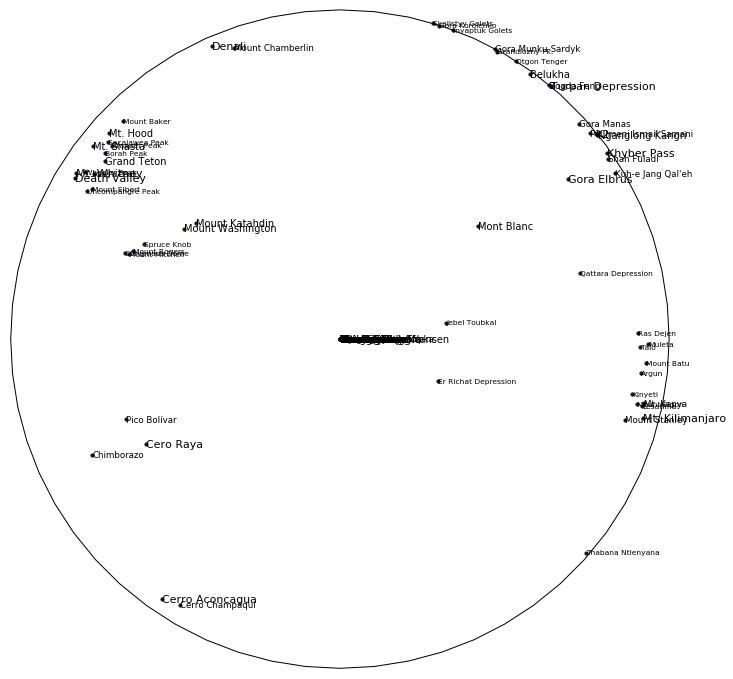

In [5]:
# PLOT ELEVATION LABELS

fname = "./data/Natural_Earth/ne_10m_geography_regions_elevation_points/ne_10m_geography_regions_elevation_points.shp"
savename = './figures/mountain_labels.pdf'
shp = shpreader.Reader(fname)

fig = plt.figure(figsize=figsize)
grid = matplotlib.gridspec.GridSpec(5565, 5859)
ax = fig.add_subplot(grid[39:5565-39, 186:5859-186], projection=ccrs.Orthographic(*ortho))

for record, state in zip(shp.records(), shp.geometries()):
    text = record.attributes['name']
    lat_y = record.attributes['lat_y']
    long_x = record.attributes['long_x']
    scalerank = record.attributes['scalerank']
    fontsize = min(1, max(0, (6-(scalerank-2))/6))*7+4
    if (fontsize > 7) and len(text) > 0:
        ax.text(long_x, lat_y, text, transform=ccrs.PlateCarree(), 
                ha='left', va='center', fontsize=fontsize, color='k')
        ax.scatter(long_x, lat_y, transform=ccrs.PlateCarree(), s=10, color='#10112d', edgecolor=None)
        
set_save_image(fig, savename, show=True)

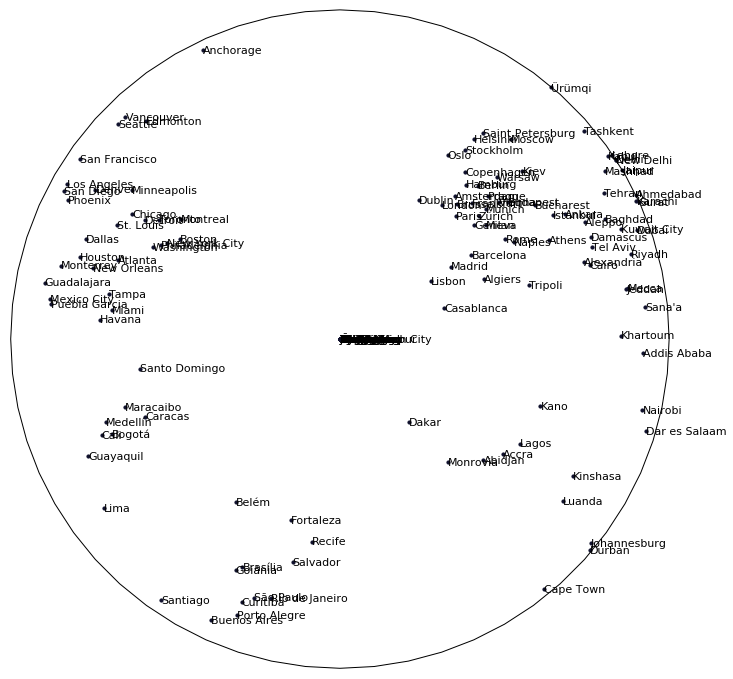

In [6]:
# PLOT CULTURAL LABELS

fname = "./data/Natural_Earth/ne_10m_populated_places/ne_10m_populated_places.shp"
savename = './figures/city_labels.pdf'
shp = shpreader.Reader(fname)

fig = plt.figure(figsize=figsize)
grid = matplotlib.gridspec.GridSpec(5565, 5859)
ax = fig.add_subplot(grid[39:5565-39, 186:5859-186], projection=ccrs.Orthographic(*ortho))

for record, state in zip(shp.records(), shp.geometries()):
    text = record.attributes['name_en']
    lat_y = record.attributes['LATITUDE']
    long_x = record.attributes['LONGITUDE']
    scalerank = record.attributes['SCALERANK']
    fontsize = min(1, max(0, (6-(scalerank-2))/6))*7+4
    if fontsize > 10 and len(text) > 1:
        ax.text(long_x, lat_y, text, transform=ccrs.PlateCarree(), 
                ha='left', va='center', fontsize=fontsize, color='k')
        ax.scatter(long_x, lat_y, transform=ccrs.PlateCarree(), s=10, color='#10112d', edgecolor=None)

set_save_image(fig, savename, show=True)

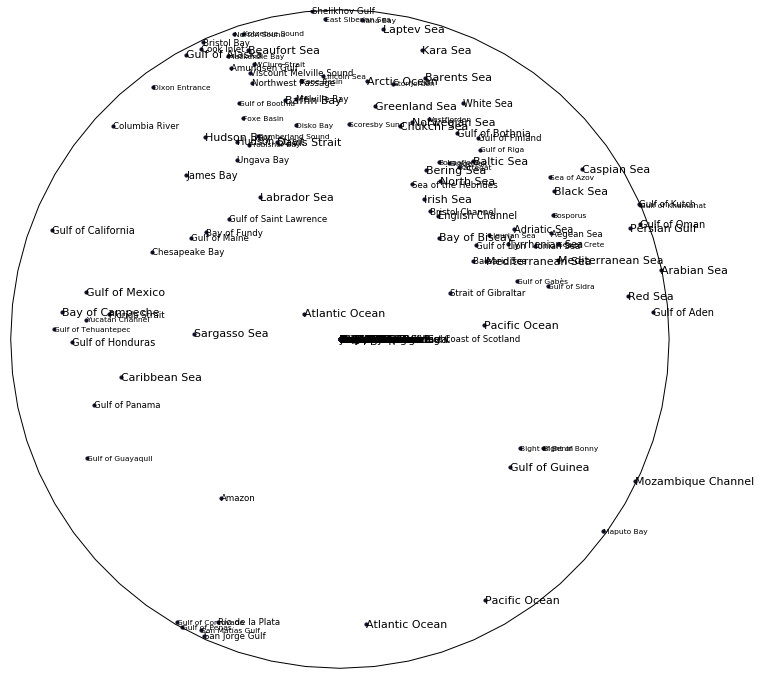

In [7]:
# PLOT MARINE GEOGRAPHY LABELS

fname = "./data/Natural_Earth/ne_10m_geography_marine_polys/ne_10m_geography_marine_polys.shp"
savename = './figures/marine_labels.pdf'
shp = shpreader.Reader(fname)

fig = plt.figure(figsize=figsize)
grid = matplotlib.gridspec.GridSpec(5565, 5859)
ax = fig.add_subplot(grid[39:5565-39, 186:5859-186], projection=ccrs.Orthographic(*ortho))

for record, state in zip(shp.records(), shp.geometries()):
    text = record.attributes['name_en']
    xmin, ymin, xmax, ymax = state.bounds
    plotx, ploty = xmin+(xmax-xmin)/2, ymin+(ymax-ymin)/2
    scalerank = record.attributes['scalerank']
    fontsize = min(1, max(0, (6-(scalerank-2))/6))*7+4
    if fontsize > 7 and len(text) > 1:
        ax.text(plotx, ploty, text, transform=ccrs.PlateCarree(), 
                ha='left', va='center', fontsize=fontsize, color='k')
        ax.scatter(plotx, ploty, transform=ccrs.PlateCarree(), s=10, color='#10112d', edgecolor=None)
        
set_save_image(fig, savename, show=True)

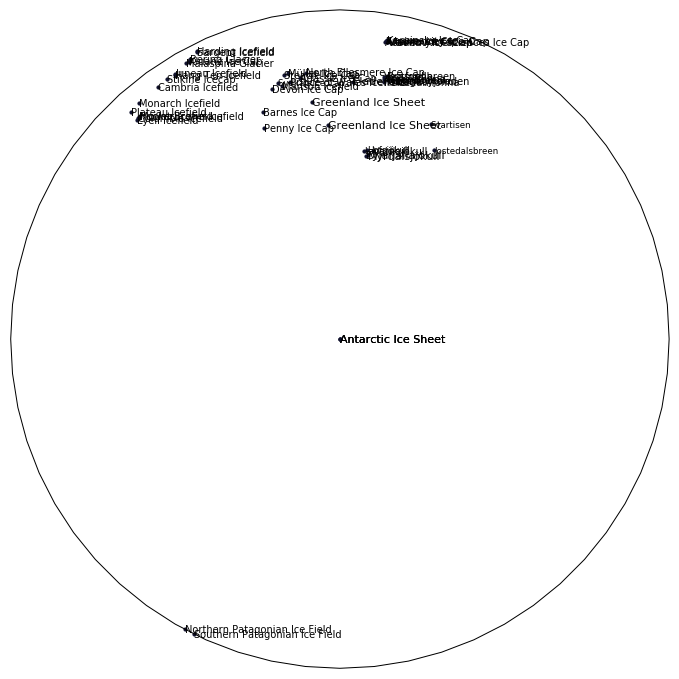

In [8]:
# PLOT GLACIER LABELS

fname = "./data/Natural_Earth/ne_10m_glaciated_areas/ne_10m_glaciated_areas.shp"
savename = './figures/glacier_labels.pdf'
shp = shpreader.Reader(fname)

fig = plt.figure(figsize=figsize)
grid = matplotlib.gridspec.GridSpec(5565, 5859)
ax = fig.add_subplot(grid[39:5565-39, 186:5859-186], projection=ccrs.Orthographic(*ortho))

for record, state in zip(shp.records(), shp.geometries()):
    text = record.attributes['name']
    xmin, ymin, xmax, ymax = state.bounds
    plotx, ploty = xmin+(xmax-xmin)/2, ymin+(ymax-ymin)/2
    scalerank = record.attributes['scalerank']
    fontsize = min(1, max(0, (6-(scalerank-2))/6))*7+4
    if fontsize > 8 and len(text) > 1:
        ax.text(plotx, ploty, text, transform=ccrs.PlateCarree(), 
                ha='left', va='center', fontsize=fontsize, color='k')
        ax.scatter(plotx, ploty, transform=ccrs.PlateCarree(), s=10, color='#10112d', edgecolor=None)

set_save_image(fig, savename, show=True)